In [2]:
import numpy as np
import pandas as pd

from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor

from sklearn.metrics import mean_squared_error, r2_score, accuracy_score, f1_score, precision_score, recall_score

import matplotlib.pyplot as plt
import seaborn as sns




In [4]:
# Load dataset (assuming a CSV file)
df = pd.read_csv('wine-dataset.csv')  # Replace with the correct file path
df


,volatile_acidity,density,free_sulfur_dioxide,fixed_acidity,pH,quality,alcohol,citric_acid,sulphates,total_sulfur_dioxide,residual_sugar,chlorides,wine_type
0,0.420,0.99848,57.0,6.9,3.08,5.0,9.4,0.20,0.54,201.0,15.4,0.043,White
1,0.530,0.99489,29.0,6.5,3.38,6.0,10.3,0.06,0.83,44.0,2.0,0.063,Red
2,0.270,0.99790,50.0,6.8,3.03,6.0,8.6,0.28,0.38,163.0,13.3,0.076,White
3,0.160,0.99494,24.0,6.7,3.34,6.0,11.2,0.64,0.71,52.0,2.1,0.059,Red
4,0.545,0.99650,27.0,7.9,3.36,6.0,10.7,0.06,0.67,61.0,4.0,0.087,Red
...,...,...,...,...,...,...,...,...,...,...,...,...,...
6492,0.610,0.99740,9.0,7.8,3.26,5.0,9.1,0.29,1.56,29.0,1.6,0.114,Red
6493,0.900,0.99467,9.0,6.5,3.50,6.0,10.9,0.00,0.63,17.0,1.6,0.052,Red
6494,0.400,0.99650,24.0,7.5,3.34,5.0,9.4,0.18,0.58,58.0,1.6,0.079,Red
6495,0.640,0.99496,9.0,6.0,3.52,5.0,10.6,0.05,0.78,17.0,1.9,0.066,Red


In [5]:
print(df.head())

   volatile_acidity  density  free_sulfur_dioxide  fixed_acidity    pH  \
0             0.420  0.99848                 57.0            6.9  3.08   
1             0.530  0.99489                 29.0            6.5  3.38   
2             0.270  0.99790                 50.0            6.8  3.03   
3             0.160  0.99494                 24.0            6.7  3.34   
4             0.545  0.99650                 27.0            7.9  3.36   

   quality  alcohol  citric_acid  sulphates  total_sulfur_dioxide  \
0      5.0      9.4         0.20       0.54                 201.0   
1      6.0     10.3         0.06       0.83                  44.0   
2      6.0      8.6         0.28       0.38                 163.0   
3      6.0     11.2         0.64       0.71                  52.0   
4      6.0     10.7         0.06       0.67                  61.0   

   residual_sugar  chlorides wine_type  
0            15.4      0.043     White  
1             2.0      0.063       Red  
2            13.3

In [6]:
print(df.describe())


       volatile_acidity      density  free_sulfur_dioxide  fixed_acidity  \
count       6497.000000  6497.000000          6497.000000    6497.000000   
mean           0.339666     0.994697            30.525319       7.215307   
std            0.164636     0.002999            17.749400       1.296434   
min            0.080000     0.987110             1.000000       3.800000   
25%            0.230000     0.992340            17.000000       6.400000   
50%            0.290000     0.994890            29.000000       7.000000   
75%            0.400000     0.996990            41.000000       7.700000   
max            1.580000     1.038980           289.000000      15.900000   

                pH      quality      alcohol  citric_acid    sulphates  \
count  6497.000000  6497.000000  6497.000000  6497.000000  6497.000000   
mean      3.218501     5.818378    10.491801     0.318633     0.531268   
std       0.160787     0.873255     1.192712     0.145318     0.148806   
min       2.720000 

In [7]:
# Check for missing values
print("\nMissing values in each column:")
print(df.isnull().sum())




Missing values in each column:
volatile_acidity        0
density                 0
free_sulfur_dioxide     0
fixed_acidity           0
pH                      0
quality                 0
alcohol                 0
citric_acid             0
sulphates               0
total_sulfur_dioxide    0
residual_sugar          0
chlorides               0
wine_type               0
dtype: int64


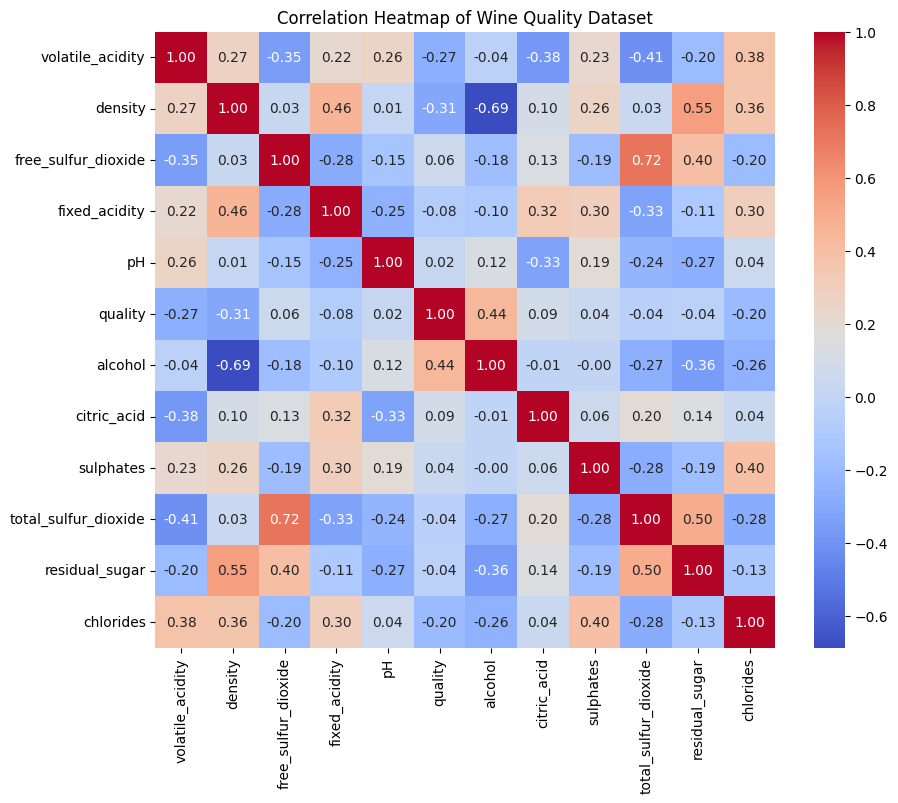

In [21]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Plot the correlation heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(df.corr(), annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Heatmap of Wine Quality Dataset")
plt.show()


In [24]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler


df = df.dropna()

# Define features (X) and target (y)
X = df.drop("quality", axis=1)  # Adjust 'quality' if the target column has a different name
y = df["quality"]

# Optionally, scale features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Optionally split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Output the shapes of the training and test sets
print("Training features shape:", X_train.shape)
print("Testing features shape:", X_test.shape)
print("Training labels shape:", y_train.shape)
print("Testing labels shape:", y_test.shape)


Training features shape: (5197, 11)
Testing features shape: (1300, 11)
Training labels shape: (5197,)
Testing labels shape: (1300,)


In [26]:
from sklearn.linear_model import LinearRegression

model = LinearRegression()

model.fit(X_train, y_train)

# After training, you can check the model’s performance (e.g., R-squared score)
print("Model training completed.")

# Optionally, check how well the model performs on the training set
train_score = model.score(X_train, y_train)
print(f"Training R^2 score: {train_score:.2f}")

# Check performance on the test set
test_score = model.score(X_test, y_test)
print(f"Test R^2 score: {test_score:.2f}")


Model training completed.
Training R^2 score: 0.30
Test R^2 score: 0.27


In [28]:
import numpy as np

# Predict on the test set
y_pred = model.predict(X_test)

# Calculate the evaluation metrics
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

# Print the results
print(f"Mean Absolute Error (MAE): {mae:.2f}")
print(f"Mean Squared Error (MSE): {mse:.2f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.2f}")
print(f"R² Score: {r2:.2f}")


Mean Absolute Error (MAE): 0.58
Mean Squared Error (MSE): 0.57
Root Mean Squared Error (RMSE): 0.75
R² Score: 0.27


In [29]:
from sklearn.model_selection import cross_val_score
import numpy as np

# Perform k-fold cross-validation (e.g., 5 folds)
scores = cross_val_score(model, X_scaled, y, cv=5, scoring="r2")

# Print the R² scores for each fold
print("Cross-Validation R² Scores:", scores)

# Print the mean R² score across all folds
print("Mean Cross-Validation R² Score:", np.mean(scores))


Cross-Validation R² Scores: [0.29107853 0.31595095 0.30127123 0.25478522 0.27753273]
Mean Cross-Validation R² Score: 0.2881237324491514


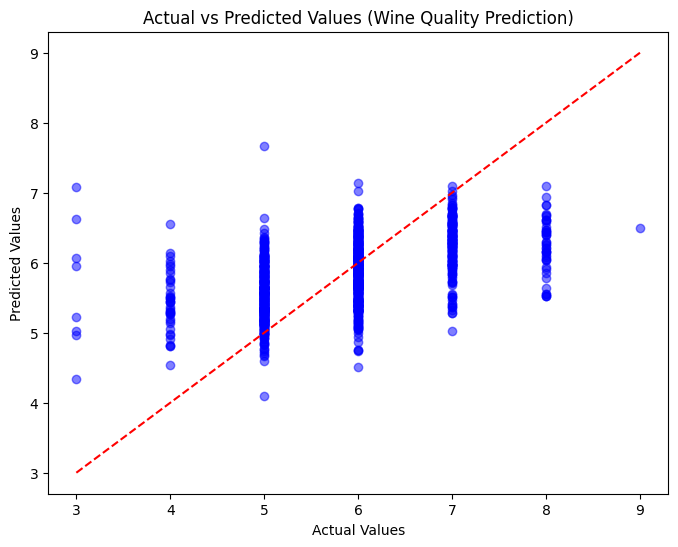

In [30]:
import matplotlib.pyplot as plt

# Predict on the test set
y_pred = model.predict(X_test)

# Plot actual vs predicted values
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, color='blue', alpha=0.5)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--')  # Line for perfect predictions
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.title("Actual vs Predicted Values (Wine Quality Prediction)")
plt.show()
